In [1]:
# Importing libraries

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [3]:
#Loading Dataset

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

In [5]:
# data overview

In [6]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [8]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Data Processing

In [10]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
s_data.shape

(25, 2)

# EDA

# Exploring the pdfs of variable

Text(0.5,1,'Scores distribution')

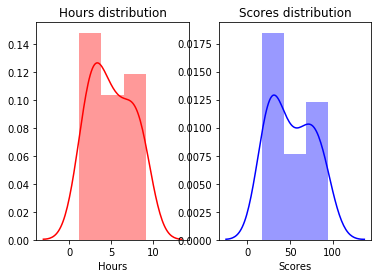

In [12]:
# Plotting the distribution of scores
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
p1=sns.distplot(s_data['Hours'],label='Hours',color='red')
plt.title('Hours distribution')
plt.subplot(1,2,2)
p2=sns.distplot(s_data['Scores'],label='Scores',color='blue')
plt.title('Scores distribution')


In [13]:
# Correlation in variables

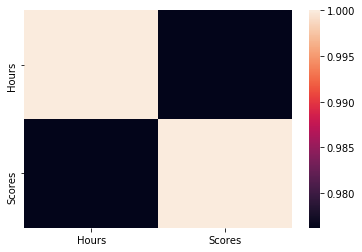

In [14]:
sns.heatmap(s_data.corr())

In [15]:
# Linear

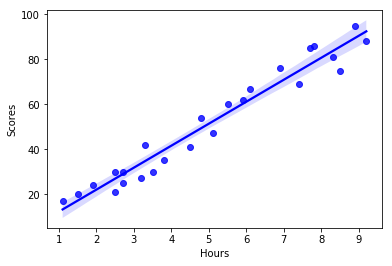

In [16]:
sns.regplot(x=s_data['Hours'],y=s_data['Scores'],color='blue')

As we can see the linearity in the  graph

# Normality amd HOmoscedasticity
As we can see from the pdf distribution that it follows them

# 3. No Autocorrelation
AS THE DATASET IS NOT FROM TIME-SERIES OR PANEL DATA, EACH ROW IS DIFFERENT

# 4. No Multicollinearity
AS WE ARE PERFORMING SIMPLE LINEAR REGRESSION.

# Declare The Inputs And Targets

In [17]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [18]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Model

### 1. Linear regression Model

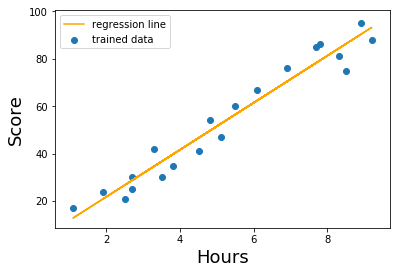

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
yhat = (reg.coef_*X_train )+reg.intercept_
plt.plot(X_train,yhat,c='orange',label='regression line')
plt.scatter(X_train,y_train,label='trained data')
plt.xlabel('Hours',fontsize=18)
plt.ylabel('Score',fontsize=18)
plt.legend()

### 2.Prediction

In [22]:
prediction1 = reg.predict(X_test)
prediction1

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### 3. compairing actual and predicted value

In [23]:
compare = pd.DataFrame({'Actual':y_test})
compare.reset_index(drop=True,inplace=True)
compare['Predicted1']=prediction1
compare['Deviation']=abs(compare['Actual']-compare['Predicted1'])
compare

,Actual,Predicted1,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


### 4.Visualizing actual and predicted values

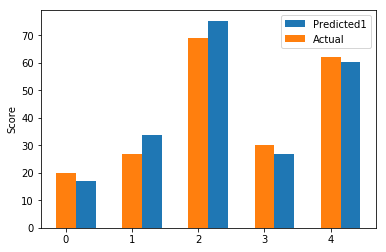

In [24]:

plt.bar(np.arange(5)+0.3,compare.Predicted1,width=0.3,label='Predicted1')
plt.bar(np.arange(5),compare.Actual,width=0.3,label='Actual')
plt.ylabel('Score')
plt.legend()

### 5. Visualizing the deviation

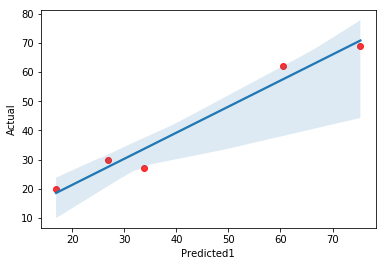

In [25]:
sns.regplot('Predicted1','Actual',data=compare,scatter_kws={'color':'red'})

### 6. Evaluating this model

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE1 = mean_absolute_error(prediction1 , y_test)
RMSE1 = np.sqrt(mean_squared_error(prediction1 , y_test))
print('Mean Absolute Error = ',MAE1.round(3))
print('Root Mean Squared Error = ',RMSE1.round(3))

Mean Absolute Error =  4.184
Root Mean Squared Error =  4.647


### 7. Result of this model

In [27]:
n = float(input())
Score = reg.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[93.69]


### II. Ridge Regression Model

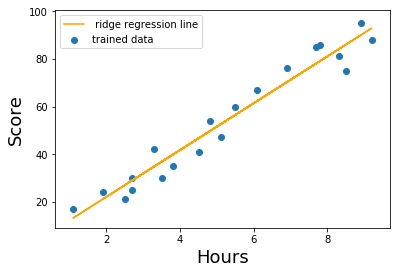

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
yhat = (ridge.coef_*X_train )+ridge.intercept_
plt.plot(X_train,yhat,c='orange',label=' ridge regression line')
plt.scatter(X_train,y_train,label='trained data')
plt.xlabel('Hours',fontsize=18)
plt.ylabel('Score',fontsize=18)
plt.legend()

### 1. Prediction

In [29]:
prediction2=ridge.predict(X_test)
prediction2

array([17.18169996, 33.89456361, 75.18516794, 27.01279622, 60.43852354])

### 2. Comparing actual and predicted values

In [30]:
compare2 = pd.DataFrame({'Actual':y_test,'Prediction2':prediction2})
compare2['Deviation'] = abs(compare2['Actual']-compare2['Prediction2'])
compare2.reset_index(drop=True)

,Actual,Prediction2,Deviation
0,20,17.181700,2.818300
1,27,33.894564,6.894564
2,69,75.185168,6.185168
3,30,27.012796,2.987204
4,62,60.438524,1.561476


In [31]:

compare2

,Actual,Prediction2,Deviation
0,20,17.181700,2.818300
1,27,33.894564,6.894564
2,69,75.185168,6.185168
3,30,27.012796,2.987204
4,62,60.438524,1.561476


### 3. Visualize actual and predicted values

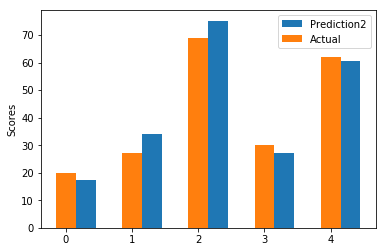

In [32]:
plt.bar(np.arange(5)+0.3,compare2.Prediction2,width=0.3,label='Prediction2')
plt.bar(np.arange(5),compare2.Actual,width=0.3,label='Actual')
plt.ylabel('Scores')
plt.legend()

### 4. Visualize the deviationcompare.Actual,

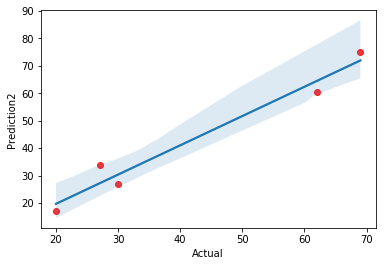

In [33]:
sns.regplot('Actual','Prediction2',data=compare2,scatter_kws={'color':'red'})

### 5. Evaluating the model

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE2=mean_absolute_error(prediction2,y_test)
RMSE2=np.sqrt(mean_squared_error(prediction2,y_test))
print("Mean Absolute Error : ",MAE2.round(3))
print("Root Mean Squared Error : ",RMSE2.round(3))

Mean Absolute Error :  4.089
Root Mean Squared Error :  4.585


### 6. Result

In [35]:
n=float(input())
Score=ridge.predict([[n]])
print("After studying for {} hours the estimated score should be \n{}".format(n,Score.round(3)))

9.25
After studying for 9.25 hours the estimated score should be 
[93.373]


### III Lasso Model

In [36]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### 1. Prediction

In [37]:
prediction3=lasso.predict(X_test)
prediction3

array([17.48947948, 34.06244335, 75.00741292, 27.23828176, 60.3842095 ])

### 2. Compairing actual and the predicted values

In [38]:
compare3=pd.DataFrame({'Actual':y_test,'Prediction3':prediction3})
compare3.reset_index(drop=True,inplace=True)
compare3['Deviation3']=abs(compare['Actual']-compare3['Prediction3'])
compare3

,Actual,Prediction3,Deviation3
0,20,17.489479,2.510521
1,27,34.062443,7.062443
2,69,75.007413,6.007413
3,30,27.238282,2.761718
4,62,60.384210,1.615790


### 3. Visualizing actual and the predicted values

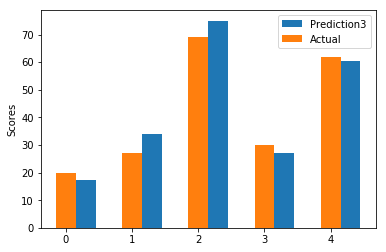

In [39]:
plt.bar(np.arange(5)+0.3,compare3.Prediction3,width=0.3,label='Prediction3')
plt.bar(np.arange(5),compare3.Actual,width=0.3,label='Actual')
plt.ylabel('Scores')
plt.legend()

### 4. Visualizing Deviation

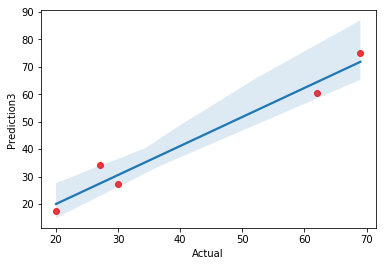

In [40]:
sns.regplot('Actual','Prediction3',data=compare3,scatter_kws={'color':'red'})

### 5. Evaluating the model

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE3=mean_absolute_error(prediction3,y_test)
RMSE3=np.sqrt(mean_squared_error(prediction3,y_test))
print('mean_absolute_error :',MAE3.round(3))
print('mean_squared_error :',RMSE3.round(3))

mean_absolute_error : 3.992
mean_squared_error : 4.528


### 6. Result

In [42]:
n=float(input())
Score=lasso.predict([[n]])
print("After studying for {} hours the estimated score should be \n{}".format(n,Score.round(3)))

9.25
After studying for 9.25 hours the estimated score should be 
[93.043]


### IV Elastic Net model

In [43]:
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet()
elasticNet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### 1. Prediction

In [44]:
prediction4=elasticNet.predict(X_test)
prediction4

array([19.939207  , 35.39865836, 73.59259703, 29.03300192, 59.95190465])

### 2. Comparision of actual and predicted values

In [45]:
compare4=pd.DataFrame({'Actual':y_test,'Prediction4':prediction4})
compare4.reset_index(drop=True,inplace=True)
compare4['Deviation4']=abs(compare4['Actual']-compare4['Prediction4'])
compare4

,Actual,Prediction4,Deviation4
0,20,19.939207,0.060793
1,27,35.398658,8.398658
2,69,73.592597,4.592597
3,30,29.033002,0.966998
4,62,59.951905,2.048095


### 3. Visualization of actual and predicted values

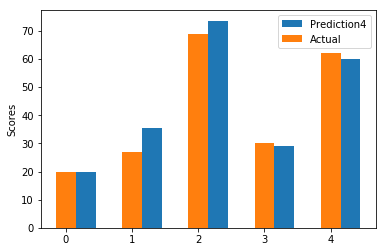

In [46]:
plt.bar(np.arange(5)+0.3,compare4.Prediction4,width=0.3,label='Prediction4')
plt.bar(np.arange(5),compare4.Actual,width=0.3,label='Actual')
plt.ylabel('Scores')
plt.legend()

### 4. visualization of deviation

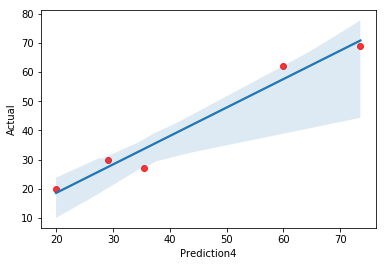

In [47]:
sns.regplot('Prediction4','Actual',data=compare4,scatter_kws={'color':'red'})

### 5. Evaluation

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE4=mean_absolute_error(prediction4,y_test)
RMSE4=np.sqrt(mean_squared_error(prediction4,y_test))
print("mean_absolute_error : ",MAE4.round(3))
print("mean_squared_error : ",RMSE4.round(3))

mean_absolute_error :  3.213
mean_squared_error :  4.399


### 6. Result

In [49]:
n=float(input())
Score=elasticNet.predict([[n]])
print("After studying for {} hours, the estimated scores will be \n{}".format(n,Score.round(3)))

9.25
After studying for 9.25 hours, the estimated scores will be 
[90.416]


# Compairing Different Models

In [50]:
final = pd.DataFrame({'Actual':y_test})
final.reset_index(drop=True,inplace=True)
final['LinearRegression'] = prediction1
final['Ridge'] = prediction2
final['Lasso'] = prediction3
final['Elasticnet'] = prediction4
final

,Actual,LinearRegression,Ridge,Lasso,Elasticnet
0,20,16.884145,17.181700,17.489479,19.939207
1,27,33.732261,33.894564,34.062443,35.398658
2,69,75.357018,75.185168,75.007413,73.592597
3,30,26.794801,27.012796,27.238282,29.033002
4,62,60.491033,60.438524,60.384210,59.951905


# Final Evaluation between Models

In [51]:
MAE = pd.DataFrame(index = np.arange(1,5))
MAE['Models'] = 'Linear','Ridge','Lasso','ElasticNet'
MAE['MEAN ABSOLUTE ERROR'] = MAE1,MAE1,MAE3,MAE4
MAE

,Models,MEAN ABSOLUTE ERROR
1,Linear,4.183860
2,Ridge,4.183860
3,Lasso,3.991577
4,ElasticNet,3.213428


In [52]:
RMSE = pd.DataFrame(index = np.arange(1,5))
RMSE['Models'] = 'Linear','Ridge','Lasso','ElasticNet'
RMSE['ROOT MEAN SQUARED ERROR'] = RMSE1,RMSE2,RMSE3,RMSE4
RMSE

,Models,ROOT MEAN SQUARED ERROR
1,Linear,4.647448
2,Ridge,4.584664
3,Lasso,4.527863
4,ElasticNet,4.399156


# FINAL RESULT

In [53]:
n = float(input())
Score = elasticNet.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[90.42]
